#### 파이썬에서 파일을 읽고 쓰기
- 파이썬 내장함수 open() 사용
        - f.open() ~ f.close()
- with문 사용
        - with open() as f:
            f.write()

#### pickle
- 파이썬에서 리스트, 튜플 등의 자료구조 형태를 유지하면서 파일로 저장, 불러올 때 사용하는 모듈
- 규칙이 있는 데이터의 형식을 유지하면서 데이터를 저장
- 바이너리 형태로 저장 (저장용량이 다른 파일구조에 비해 작다)
- 불러올때 : rd(read binary), 저장할때 : wb(write binary)

#### 네이버 영화 리뷰 데이터 분석하기

In [1]:
import pickle

In [2]:
# with문을 사용하여 파일을 불러오기
with open('movie_review.pkl', 'rb') as f:
    movie = pickle.load(f)
movie[:5] # 데이터 확인
# 0 : 영화에 대한 평가
# 1 : 영화에 대한 감성평가 - 0 : 부정, 1 : 긍정

[['아 더빙.. 진짜 짜증나네요 목소리', 0],
 ['흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', 1],
 ['너무재밓었다그래서보는것을추천한다', 0],
 ['교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', 0],
 ['사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다', 1]]

In [3]:
# 전체 리뷰데이터 수(개수) 확인하기
# len() 사용해서 리뷰의 개수 구하기
len(movie)

5000

In [4]:
# 전체 리뷰 길이의 평균값을 구해보자
# 0번 인덱스의 리뷰의 길이
len(movie[0][0])
    

19

In [5]:
# 전체 리뷰 길이의 평균값을 구해보자
# 리뷰 데이터에 접근(인덱싱)

review_len = 0 # 리뷰 전체 길이를 담아줄 변수

for i in movie:
    review_len += len(i[0])   # 전체 리뷰수만큼 반복하면서 리뷰길이를 누적
mean = review_len / len(movie)
print(f'리뷰의 평균 길이 : {mean}')

리뷰의 평균 길이 : 35.4866


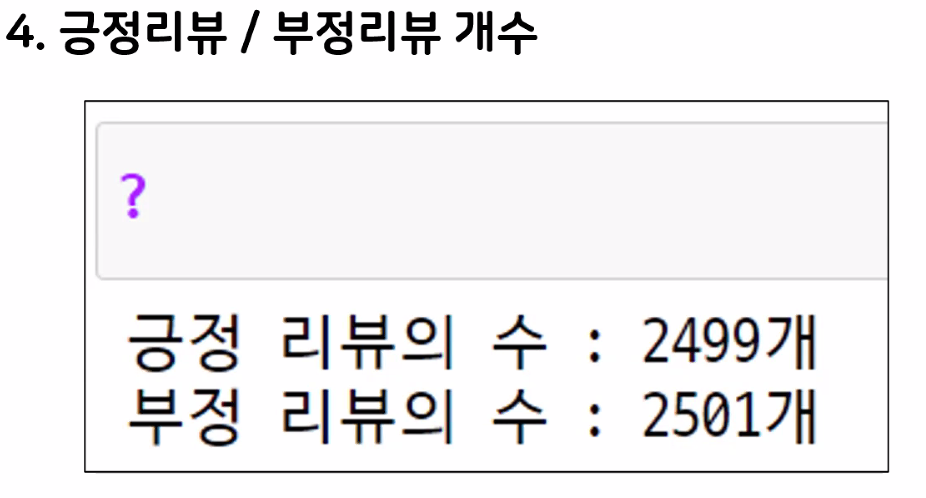

In [6]:
# 긍정 / 부정 리뷰의 개수를 구해보자
# 긍정 / 부정 리뷰 데이터에 접근(인덱싱)

good = 0
bad = 0

for i in movie:
    if i[1]:
        good += 1
    else:
        bad += 1
    i += 1
print(f'긍정 리뷰의 수 : {good}개')
print(f'부정 리뷰의 수 : {bad}개')

TypeError: 'int' object is not iterable

In [ ]:
# 긍정 / 부정 리뷰의 개수를 구해보자
# 긍정 / 부정 리뷰 데이터에 접근(인덱싱)

good = 0
bad = 0

for i in range(0, len(movie), 1):
    if movie[i][1]:
        good += 1
    else:
        bad += 1
    i += 1
print(f'긍정 리뷰의 수 : {good}개')
print(f'부정 리뷰의 수 : {bad}개')

In [ ]:
length = []

for i in movie:
    length.append(len(i[0]))
    
# length
max_num = max(length)
min_num = min(length)
print(f'최대 길이 : {max_num}')
print(f'최소 길이 : {min_num}')


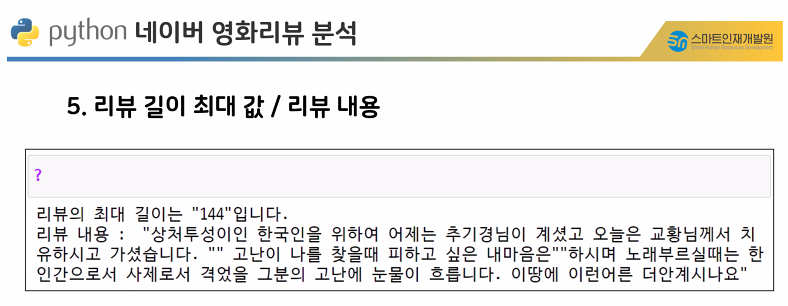

In [ ]:
# 리뷰 최대 길이 값을 이용하여 리뷰 내용 가져오기

for i in movie:
    length.append(len(i[0]))
    
max_num = max(length)
print(f'리뷰의 최대 길이는 "{max_num}" 입니다')
print(f'리뷰 내용 : 모루게따!\ㅣ;.p')

In [ ]:
max_num = len(movie[0][0])
max_review = ''

for i in movie:
    if max_num < len(i[0]):
        max_num = len(i[0])
        max_review = i[0]
        
print(f'리뷰의 최대 길이는 {max_num}입니다.')
print(f'리뷰 내용 : {max_review}')

In [ ]:
# 리뷰 최소 길이 값을 이용하여 리뷰 내용 가져오기

min_con = ''

for i in movie:
    if min_num == len(i[0]):
        min_con = i[0]
        
print(f'리뷰의 최소 길이는 {min_num}입니다.')
print(f'리뷰 내용 : {min_con}')
        

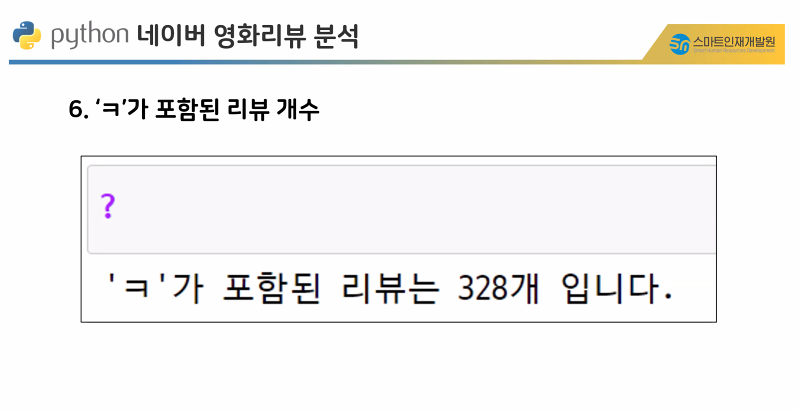

In [ ]:
cnt = 0

for i in movie:
    if 'ㅋ' in i[0]:
        cnt += 1
print(f'\'ㅋ\'가 포함된 리뷰는 {cnt}개 입니다')
    

In [ ]:
cnt = 0
text = input('검색할 데이터 입력 >> ')

for i in movie:
    if text in i[0]:
        cnt += 1
print(f'{text}가 포함된 리뷰는 {cnt}개 입니다')
    

In [ ]:
# 부정인 리뷰 중 최대 길이를 구하고, 리뷰 내용 가져오기

max_neg = len(movie[0][0])
bad_con = ''

for i in movie:
    if i[1] == 0: # 부정 데이터에 접근
        if max_neg < len(i[0]):
            max_neg = len(i[0])
            bad_con = i[0]
print(f'부정 리뷰중 최대 리뷰 길이는 {max_neg}입니다')
print(f'부정 리뷰 내용은 {bad_con}입니다')
        

#### 멜론차트 Top100 활용해서 데이터를 분석해보고 나만의 차트를 만들기

In [7]:
# 멜론차트 데이터를 불러와서 데이터 확인해보기
# with 문 사용해서 데이터 불러오기
with open('music_100.pkl', 'rb') as f:
    melon = pickle.load(f)

In [ ]:
melon[:3]

In [ ]:
# 슬라이싱 : 82위 ~ 98위곡 차트 출력해보기
melon[81:98]

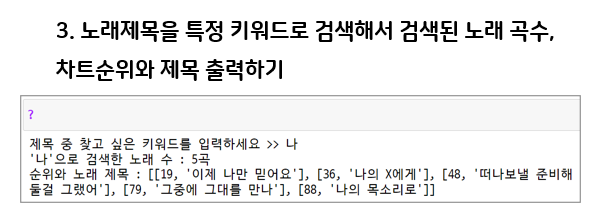

In [8]:
cnt = 0
title = []
text = input('제목 중 찾고 싶은 키워드를 입력하세요 >> ')

for i in melon:
    if text in i[1]:
        cnt += 1
        title.append([i[0],i[1]])
        
print(f'\'{text}\'으로 검색한 노래 수 : {cnt}곡')
print(f'순위와 노래 제목 : {title}')
    

제목 중 찾고 싶은 키워드를 입력하세요 >> 나
'나'으로 검색한 노래 수 : 5곡
순위와 노래 제목 : [[19, '이제 나만 믿어요'], [43, '나의 X에게'], [45, '떠나보낼 준비해 둘걸 그랬어'], [91, '그중에 그대를 만나'], [98, '나의 목소리로']]


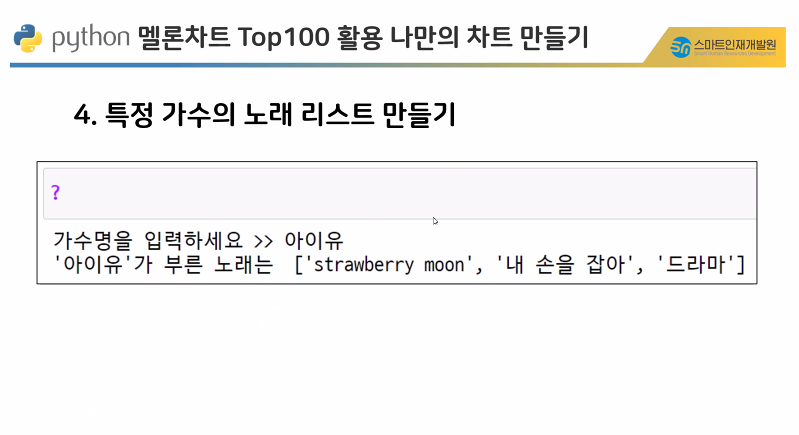

In [9]:
chart = []
singer = input('가수명을 입력하세요 >> ')

for i in melon:
    if singer in i[2]:
        chart.append([i[1]])
print(f'\'{singer}\'가 부른 노래는 {chart}')

가수명을 입력하세요 >> 아이유
'아이유'가 부른 노래는 [['내 손을 잡아'], ['드라마'], ['strawberry moon']]


In [ ]:
babo = '장서연 개바보'
print(f'{babo}')

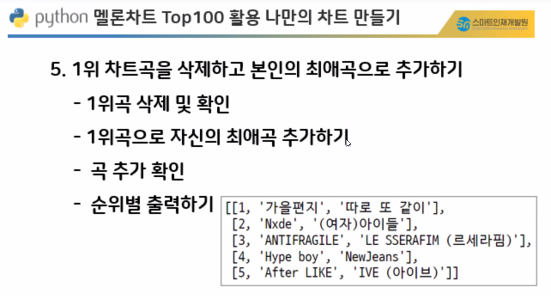

In [10]:
# 1위곡을 삭제하고 나의 최애곡으로 1위곡 만들기
# 1. 1위곡 삭제 : del
del(melon[0])


In [11]:
# 2. 삭제 확인
melon

[[2, 'ANTIFRAGILE', 'LE SSERAFIM (르세라핌)'],
 [3, 'Hype boy', 'NewJeans'],
 [4, 'Nxde', '(여자)아이들'],
 [5, 'After LIKE', 'IVE (아이브)'],
 [6, '새삥 (Prod. ZICO) (Feat. 호미들)', '지코 (ZICO)'],
 [7, '사랑은 늘 도망가', '임영웅'],
 [8, 'Attention', 'NewJeans'],
 [9, 'Rush Hour (Feat. j-hope of BTS)', 'Crush'],
 [10, 'LOVE DIVE', 'IVE (아이브)'],
 [11, '우리들의 블루스', '임영웅'],
 [12, 'Monologue', '테이'],
 [13, 'Shut Down', 'BLACKPINK'],
 [14, '다시 만날 수 있을까', '임영웅'],
 [15, 'London Boy', '임영웅'],
 [16, 'Pink Venom', 'BLACKPINK'],
 [17, '무지개', '임영웅'],
 [18, 'Polaroid', '임영웅'],
 [19, '이제 나만 믿어요', '임영웅'],
 [20, '자격지심 (Feat. ZICO)', "BE'O (비오)"],
 [21, '아버지', '임영웅'],
 [22, 'A bientot', '임영웅'],
 [23, '해요 (2022)', '#안녕'],
 [24, '손이 참 곱던 그대', '임영웅'],
 [25, '인생찬가', '임영웅'],
 [26, '딱 10CM만', '10CM, BIG Naughty (서동현)'],
 [27, 'TOMBOY', '(여자)아이들'],
 [28, '사랑해 진짜', '임영웅'],
 [29, '그때 그 순간 그대로 (그그그)', 'WSG워너비 (가야G)'],
 [30, '사랑인가 봐', '멜로망스'],
 [31, '연애편지', '임영웅'],
 [32, '내가 아니라도', '주호'],
 [33, '너의 모든 순간', '성시경'],
 [34, '그라데이션', '10CM'],
 

In [12]:

# 3. 나의 최애곡을 1위곡으로 추가하기 : append
melon.append([1, '10cm', '그라데이션'])


In [13]:

# 4. 추가되었는지 확인 후 정렬
melon
melon.sort()

In [14]:
melon[:10]

[[1, '10cm', '그라데이션'],
 [2, 'ANTIFRAGILE', 'LE SSERAFIM (르세라핌)'],
 [3, 'Hype boy', 'NewJeans'],
 [4, 'Nxde', '(여자)아이들'],
 [5, 'After LIKE', 'IVE (아이브)'],
 [6, '새삥 (Prod. ZICO) (Feat. 호미들)', '지코 (ZICO)'],
 [7, '사랑은 늘 도망가', '임영웅'],
 [8, 'Attention', 'NewJeans'],
 [9, 'Rush Hour (Feat. j-hope of BTS)', 'Crush'],
 [10, 'LOVE DIVE', 'IVE (아이브)']]

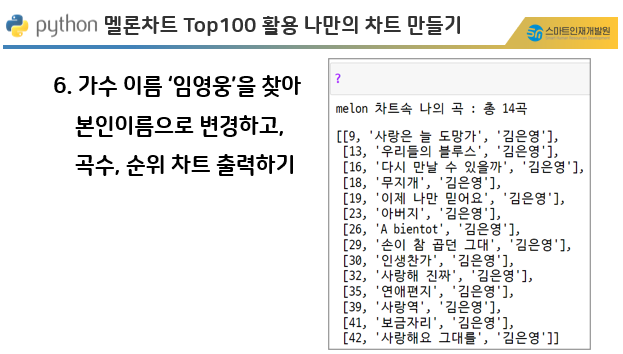

In [15]:
my_song = 0
my_chart = []

for i in melon:
    print(i) 
    if '임영웅' in i[2]:
        i[2] = '장두식'
        my_song += 1
        my_chart.append([i[0], i[1], i[2]])
        
print(f'melon 차트속 나의 곡 : 총 {my_song}곡')
print(f'{my_chart}')

[1, '10cm', '그라데이션']
[2, 'ANTIFRAGILE', 'LE SSERAFIM (르세라핌)']
[3, 'Hype boy', 'NewJeans']
[4, 'Nxde', '(여자)아이들']
[5, 'After LIKE', 'IVE (아이브)']
[6, '새삥 (Prod. ZICO) (Feat. 호미들)', '지코 (ZICO)']
[7, '사랑은 늘 도망가', '임영웅']
[8, 'Attention', 'NewJeans']
[9, 'Rush Hour (Feat. j-hope of BTS)', 'Crush']
[10, 'LOVE DIVE', 'IVE (아이브)']
[11, '우리들의 블루스', '임영웅']
[12, 'Monologue', '테이']
[13, 'Shut Down', 'BLACKPINK']
[14, '다시 만날 수 있을까', '임영웅']
[15, 'London Boy', '임영웅']
[16, 'Pink Venom', 'BLACKPINK']
[17, '무지개', '임영웅']
[18, 'Polaroid', '임영웅']
[19, '이제 나만 믿어요', '임영웅']
[20, '자격지심 (Feat. ZICO)', "BE'O (비오)"]
[21, '아버지', '임영웅']
[22, 'A bientot', '임영웅']
[23, '해요 (2022)', '#안녕']
[24, '손이 참 곱던 그대', '임영웅']
[25, '인생찬가', '임영웅']
[26, '딱 10CM만', '10CM, BIG Naughty (서동현)']
[27, 'TOMBOY', '(여자)아이들']
[28, '사랑해 진짜', '임영웅']
[29, '그때 그 순간 그대로 (그그그)', 'WSG워너비 (가야G)']
[30, '사랑인가 봐', '멜로망스']
[31, '연애편지', '임영웅']
[32, '내가 아니라도', '주호']
[33, '너의 모든 순간', '성시경']
[34, '그라데이션', '10CM']
[35, 'Cookie', 'NewJeans']
[36, 'Dreamers [Mus

In [21]:
print(f'melon 차트속 나의 곡 : 총 {my_song}곡')
my_chart

melon 차트속 나의 곡 : 총 14곡


[[7, '사랑은 늘 도망가', '장두식'],
 [11, '우리들의 블루스', '장두식'],
 [14, '다시 만날 수 있을까', '장두식'],
 [15, 'London Boy', '장두식'],
 [17, '무지개', '장두식'],
 [18, 'Polaroid', '장두식'],
 [19, '이제 나만 믿어요', '장두식'],
 [21, '아버지', '장두식'],
 [22, 'A bientot', '장두식'],
 [24, '손이 참 곱던 그대', '장두식'],
 [25, '인생찬가', '장두식'],
 [28, '사랑해 진짜', '장두식'],
 [31, '연애편지', '장두식'],
 [39, '보금자리', '장두식']]

In [22]:
# 내가 만든 나만의 멜론차트를 파일로 저장하기
with open('mymelon.pkl', 'wb') as f:
    pickle.dump(melon, f)

In [23]:
with open('mymelon.pkl', 'rb') as f:
    m = pickle.load(f)
    
m[:3]

[[1, '10cm', '그라데이션'],
 [2, 'ANTIFRAGILE', 'LE SSERAFIM (르세라핌)'],
 [3, 'Hype boy', 'NewJeans']]

In [24]:
m[:15]

[[1, '10cm', '그라데이션'],
 [2, 'ANTIFRAGILE', 'LE SSERAFIM (르세라핌)'],
 [3, 'Hype boy', 'NewJeans'],
 [4, 'Nxde', '(여자)아이들'],
 [5, 'After LIKE', 'IVE (아이브)'],
 [6, '새삥 (Prod. ZICO) (Feat. 호미들)', '지코 (ZICO)'],
 [7, '사랑은 늘 도망가', '장두식'],
 [8, 'Attention', 'NewJeans'],
 [9, 'Rush Hour (Feat. j-hope of BTS)', 'Crush'],
 [10, 'LOVE DIVE', 'IVE (아이브)'],
 [11, '우리들의 블루스', '장두식'],
 [12, 'Monologue', '테이'],
 [13, 'Shut Down', 'BLACKPINK'],
 [14, '다시 만날 수 있을까', '장두식'],
 [15, 'London Boy', '장두식']]